# 1. Find peaks and set threshold in signal

## load data

In [21]:
# load new datset
import pandas as pd
import numpy as np
full_df=pd.read_csv('https://raw.githubusercontent.com/numenta/NAB/master/data/realAWSCloudwatch/ec2_cpu_utilization_5f5533.csv')

df= full_df
#full_df.dtypes
#df.shape

df.head()

,timestamp,value
0,2014-02-14 14:27:00,51.846
1,2014-02-14 14:32:00,44.508
2,2014-02-14 14:37:00,41.244
3,2014-02-14 14:42:00,48.568
4,2014-02-14 14:47:00,46.714


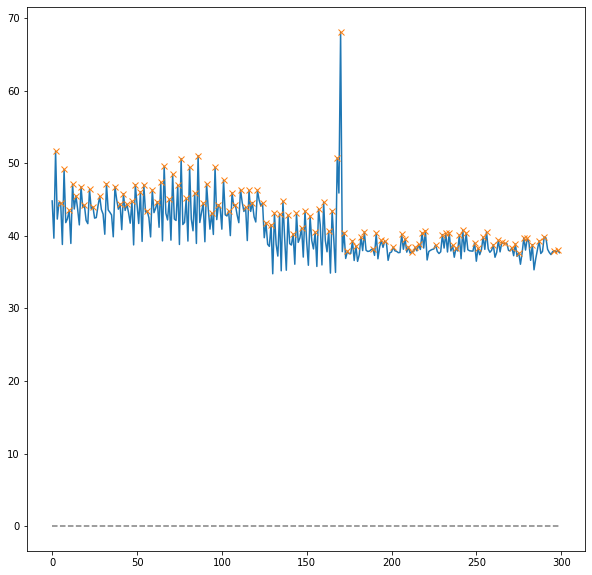

In [48]:
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks

plt.figure(figsize=(10, 10))

x = df['value'][2800:3100].values
peaks, _ = find_peaks(x, height=0)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

In [8]:
x

array([-0.9  , -0.895, -0.895, ..., -0.67 , -0.65 , -0.615])

In [9]:
df['value'].shape
df['value']

0       51.846
1       44.508
2       41.244
3       48.568
4       46.714
         ...  
4027    38.474
4028    40.352
4029    37.912
4030    38.458
4031    37.718
Name: value, Length: 4032, dtype: float64

## code example of threshold signal 

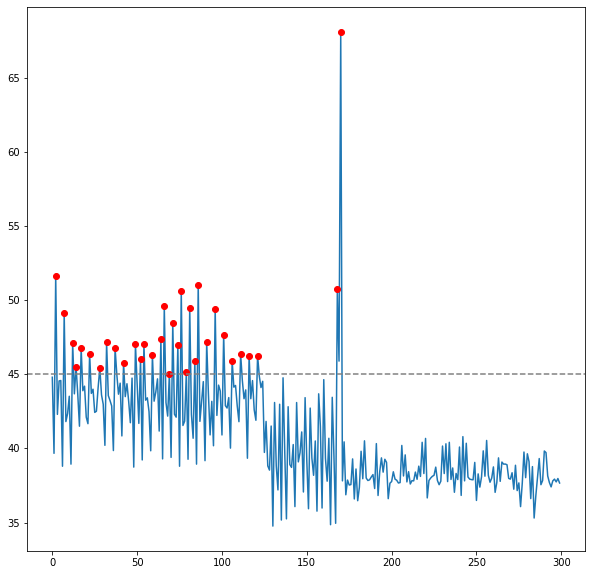

In [45]:
x = df['value'][2800:3100].values

plt.figure(figsize=(10, 10))

threshold=45
peaks, _ = find_peaks(x, height=threshold)
plt.plot(x)
plt.plot(peaks, x[peaks], "o" , color='red')
#plt.plot(np.zeros_like(x), "--", color="gray")
plt.axhline(y=threshold, color='grey', linestyle='--')
plt.show()

In [19]:
x.shape

(300,)

## threshold outliner dyn. for horizontal width 

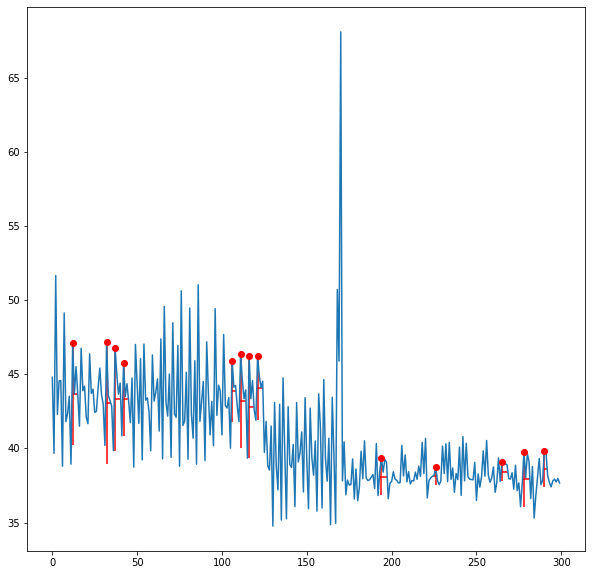

In [59]:
#x = electrocardiogram()[17000:18000]
import matplotlib.pyplot as plt

x = df['value'][2800:3100].values

width_horiz=2
peaks, properties = find_peaks(x, prominence=1, width=width_horiz)
properties["prominences"], properties["widths"]
plt.figure(figsize=(10, 10))




plt.plot(x)
plt.plot(peaks, x[peaks], "o", color="r")
plt.vlines(x=peaks, ymin=x[peaks] - properties["prominences"],
           ymax = x[peaks], color = "red")
plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"],
           xmax=properties["right_ips"], color = "red")
plt.show()

## noise detection in signal 

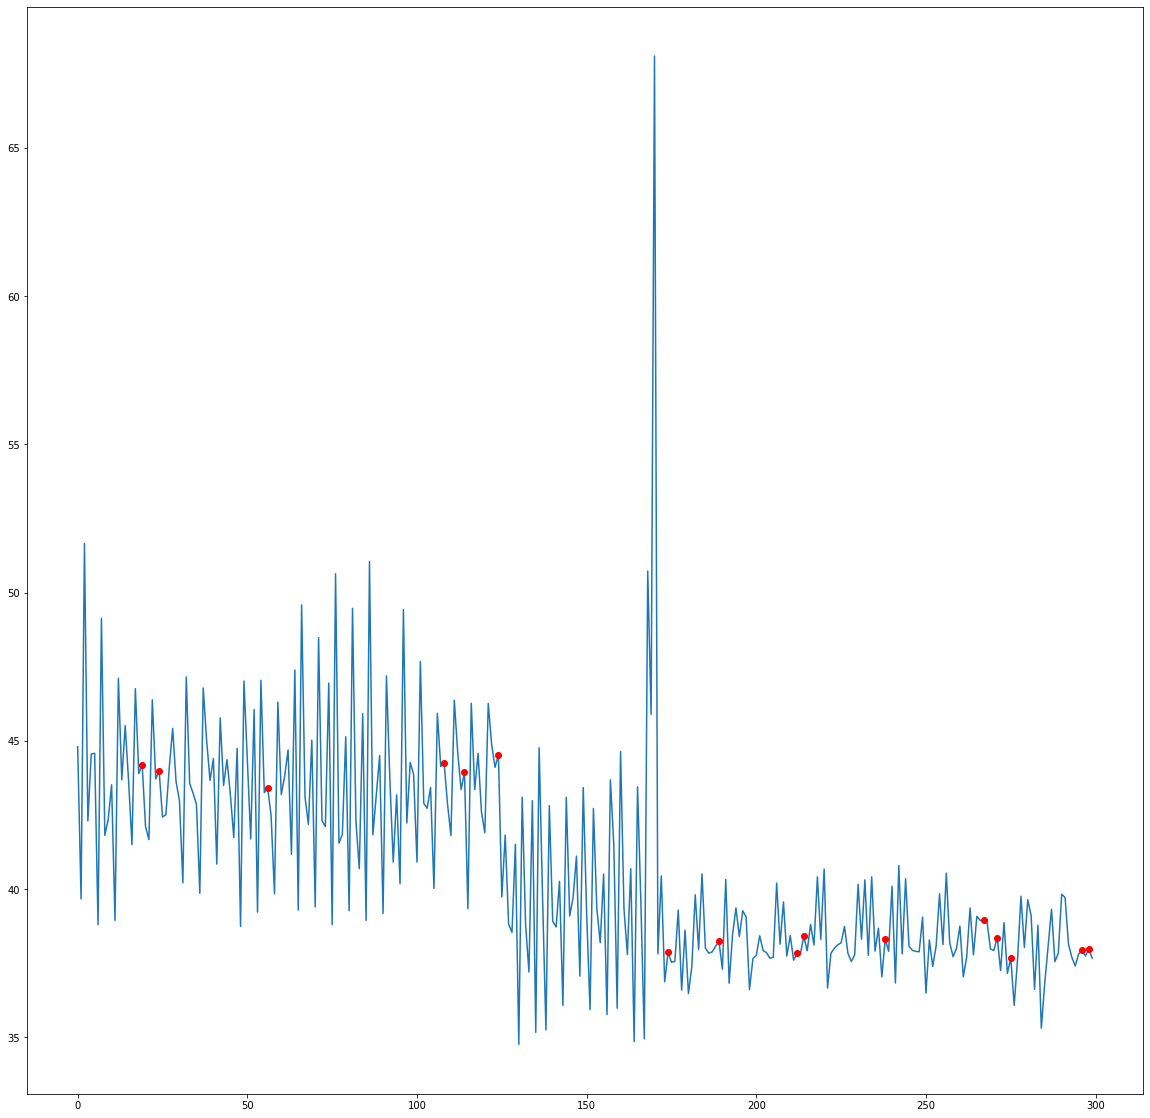

In [56]:
peaks, properties = find_peaks(x, prominence=(None, 0.6))
properties["prominences"].max()
plt.figure(figsize=(20, 20))
plt.plot(x)
plt.plot(peaks, x[peaks], "o", color="red")
plt.show()

## show only peaks 

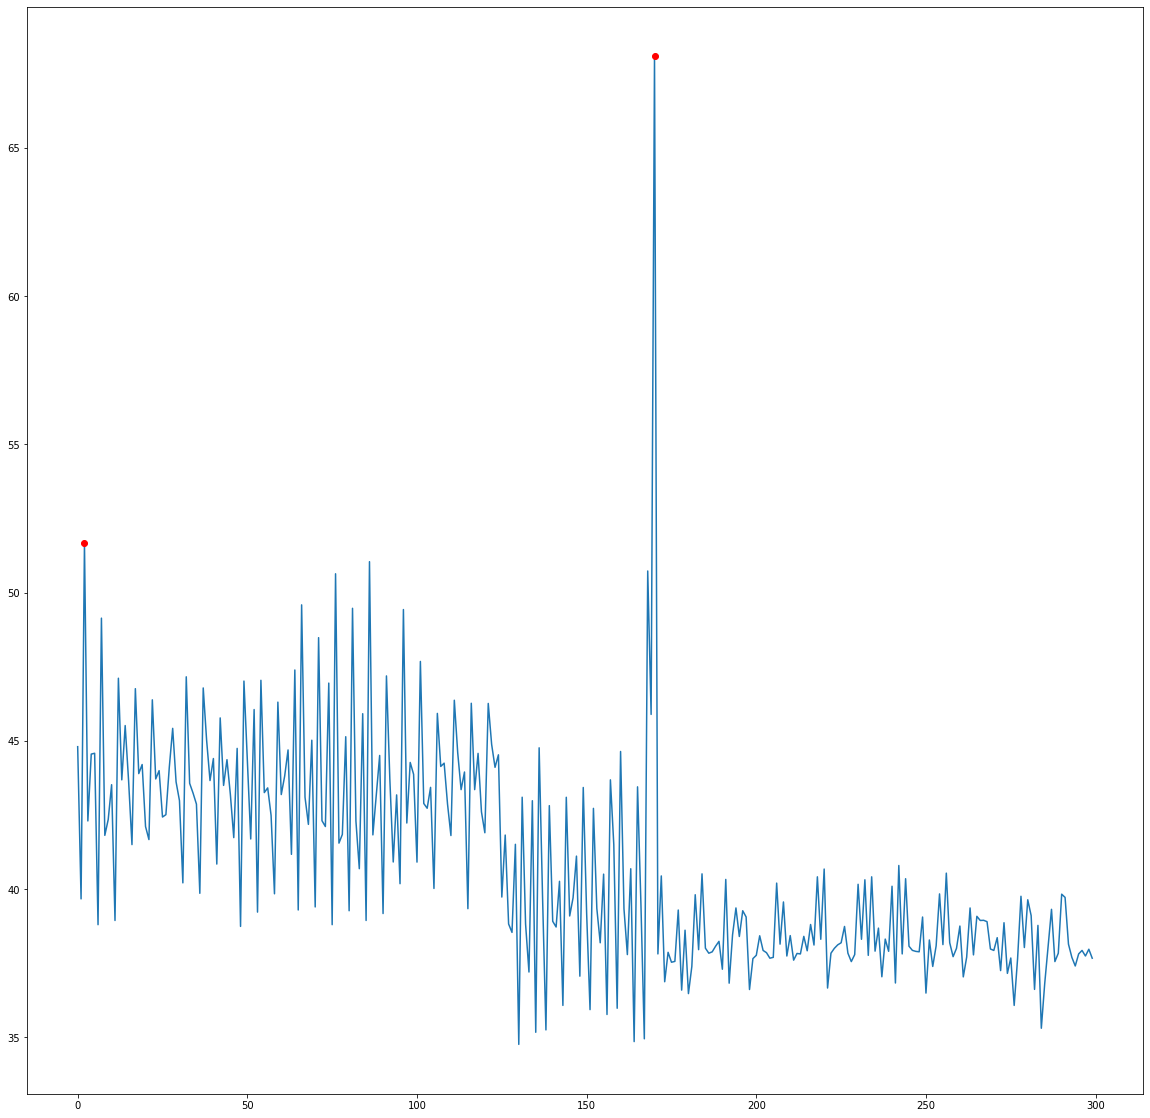

In [64]:
peaks, _ = find_peaks(x, distance=150, prominence=1)
np.diff(peaks)
plt.figure(figsize=(20, 20))

plt.plot(x)
plt.plot(peaks, x[peaks], "o", color="r")
plt.show()

## overlap the a sin signal with the original signal to detect outliners

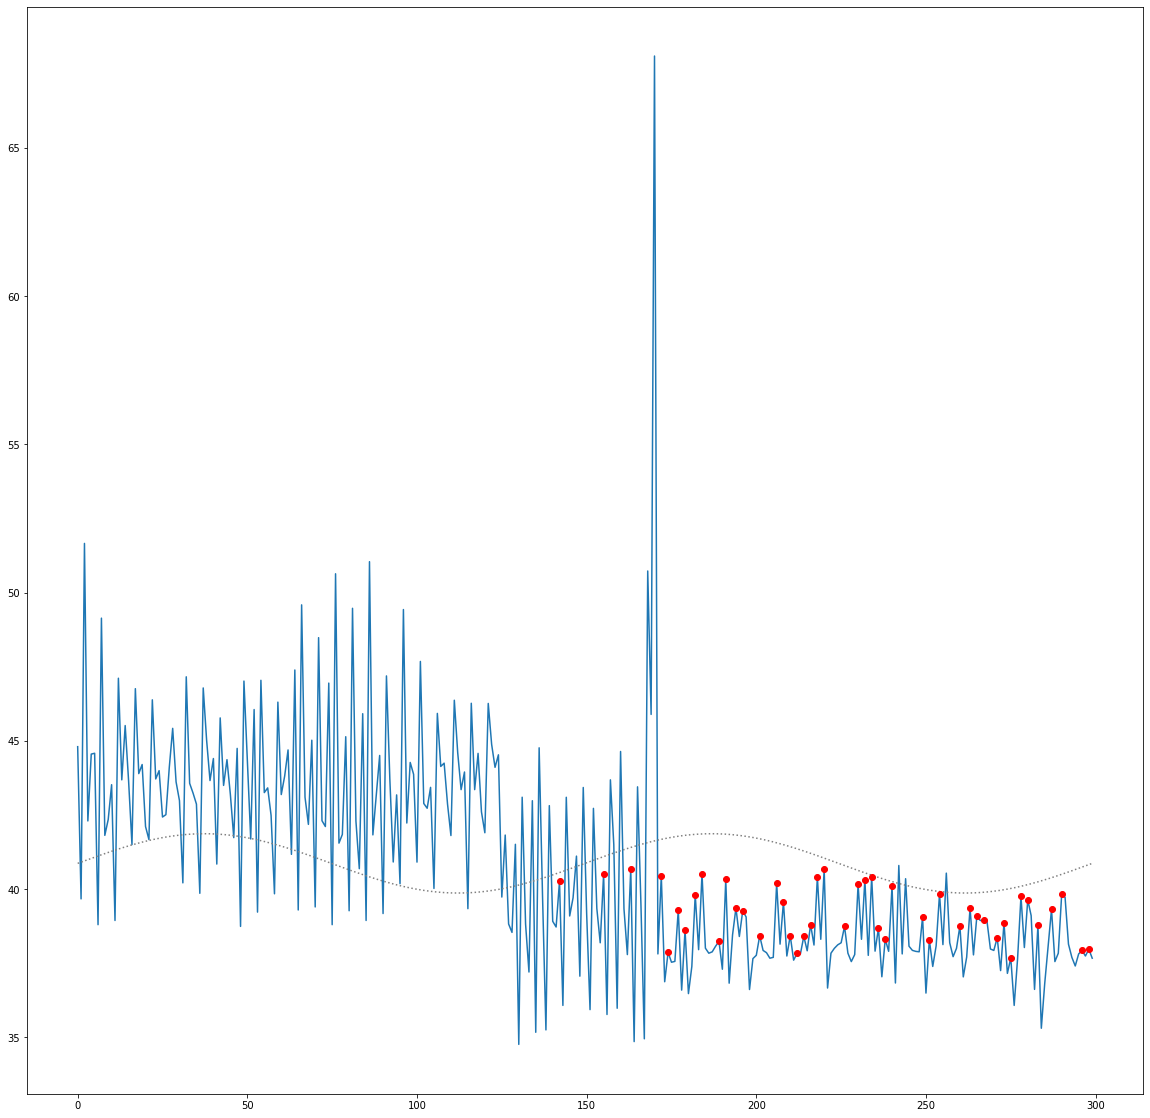

In [80]:
offset= np.average(x)

plt.figure(figsize=(20, 20))

border = np.sin(np.linspace(0, 4 * np.pi, x.size))+offset
peaks, _ = find_peaks(x, height=(-border, border))
plt.plot(x)
#plt.plot(-border, "--", color="gray")
plt.plot(border, ":", color="gray")
plt.plot(peaks, x[peaks], "o", color="r")
plt.show()